<a href="https://colab.research.google.com/github/Sidhtang/ivnsto-assignment/blob/main/assignment_from_invsto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm, probplot
from sklearn.metrics import mean_squared_error

In [52]:
##Cleaning the data

In [53]:
df= pd.read_csv('/content/all_stocks_5yr[1].csv')

In [54]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [55]:
#check for missing values
print(df.isnull().sum())

date      0
open      1
high      1
low       1
close     0
volume    0
Name      1
dtype: int64


In [56]:
#summary statistics
print(df.describe())

               open          high           low         close        volume
count  87232.000000  87232.000000  87232.000000  87233.000000  8.723300e+04
mean     102.766580    103.729986    101.774035    102.785214  5.308801e+06
std      114.829184    115.841684    113.728259    114.818841  1.524406e+07
min        1.620000      1.690000      1.610000      1.620000  3.000000e+00
25%       45.950000     46.383750     45.508750     45.980000  9.271750e+05
50%       67.680000     68.220000     67.147500     67.670000  1.909243e+06
75%      116.540000    117.530000    115.500000    116.500000  3.866446e+06
max     1477.390000   1498.000000   1450.040000   1450.890000  3.750886e+08


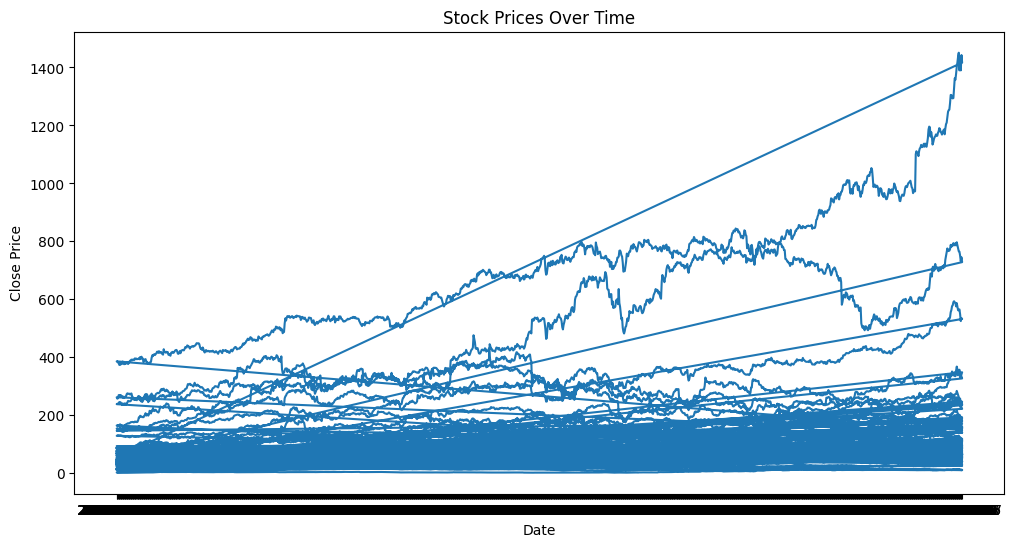

In [57]:
#visualise stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


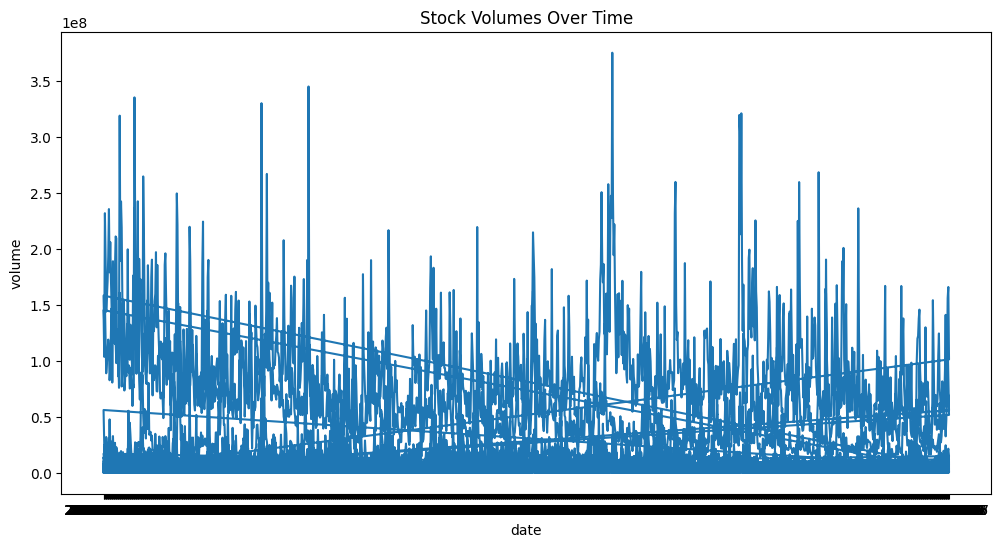

In [58]:
#visualise stock volumes over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'])
plt.title('Stock Volumes Over Time')
plt.xlabel('date')
plt.ylabel('volume')
plt.show()

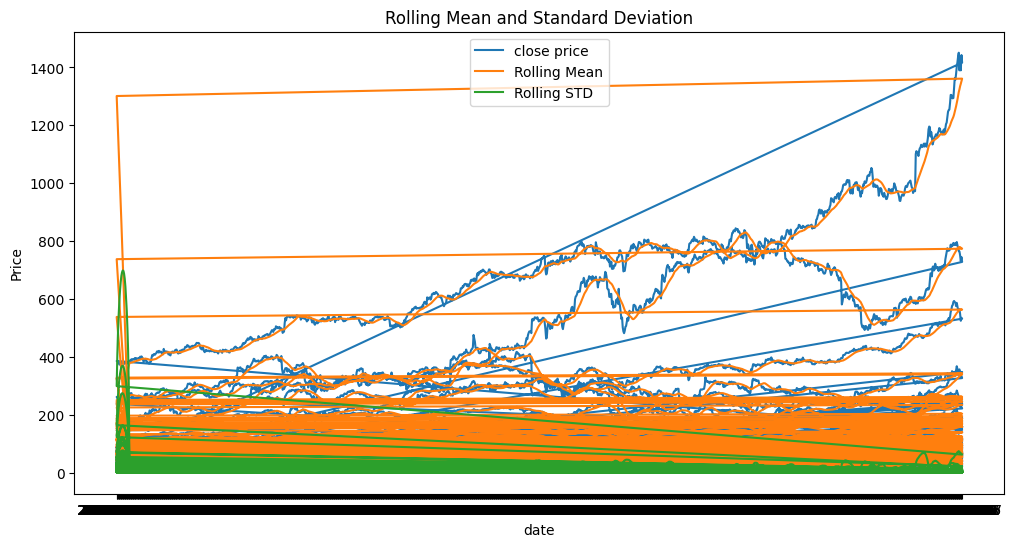

In [59]:
#visualise rolling meand and standard deviation
df['Rolling_Mean'] = df['close'].rolling(window=20).mean()
df['Rolling_STD'] = df['close'].rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='close price')
plt.plot(df['date'], df['Rolling_Mean'], label='Rolling Mean')
plt.plot(df['date'], df['Rolling_STD'], label='Rolling STD')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.show()

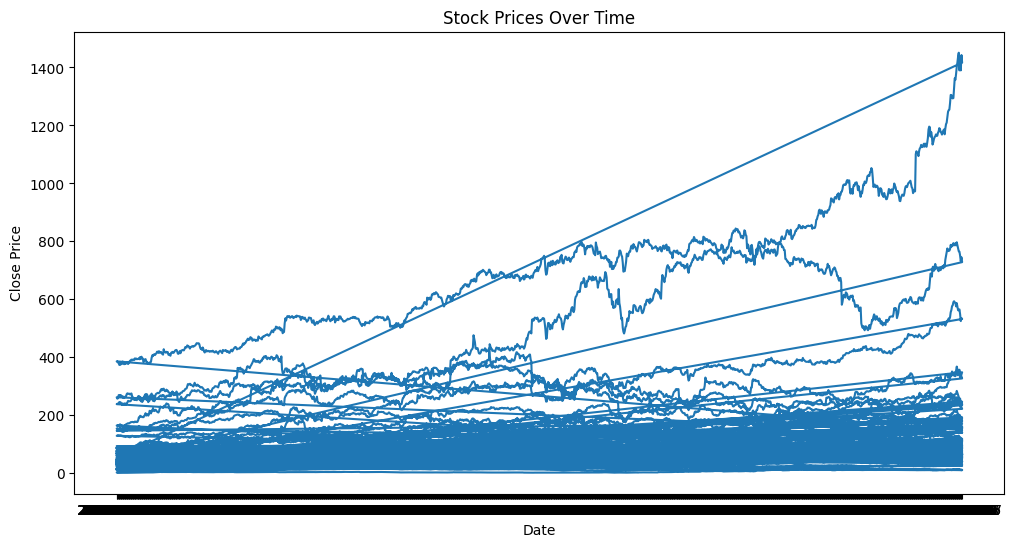

In [60]:
#visualise daily returns
df['return'] = df['close'].pct_change()
#visualise stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

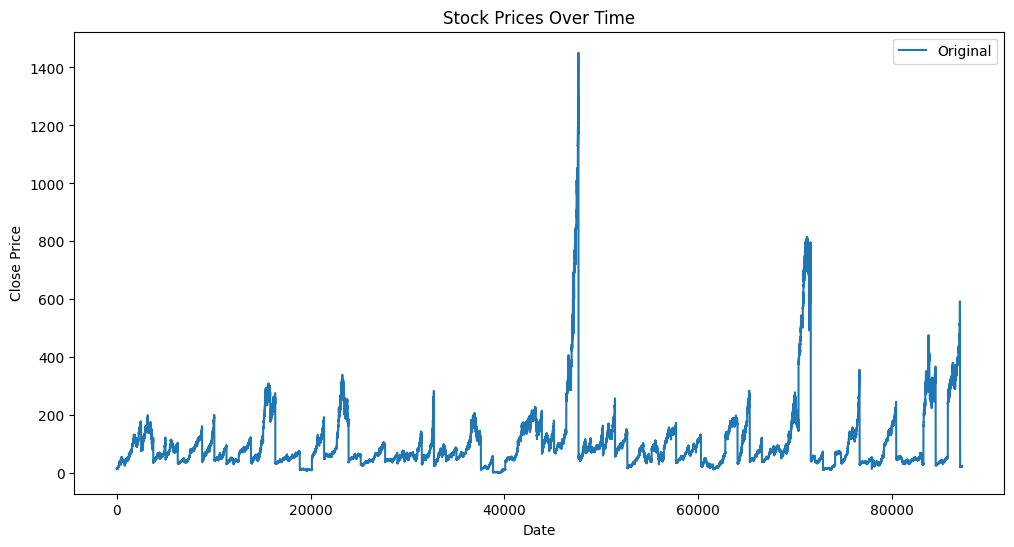

In [61]:
#generating and plotting  the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Original')
plt.legend(loc='best')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

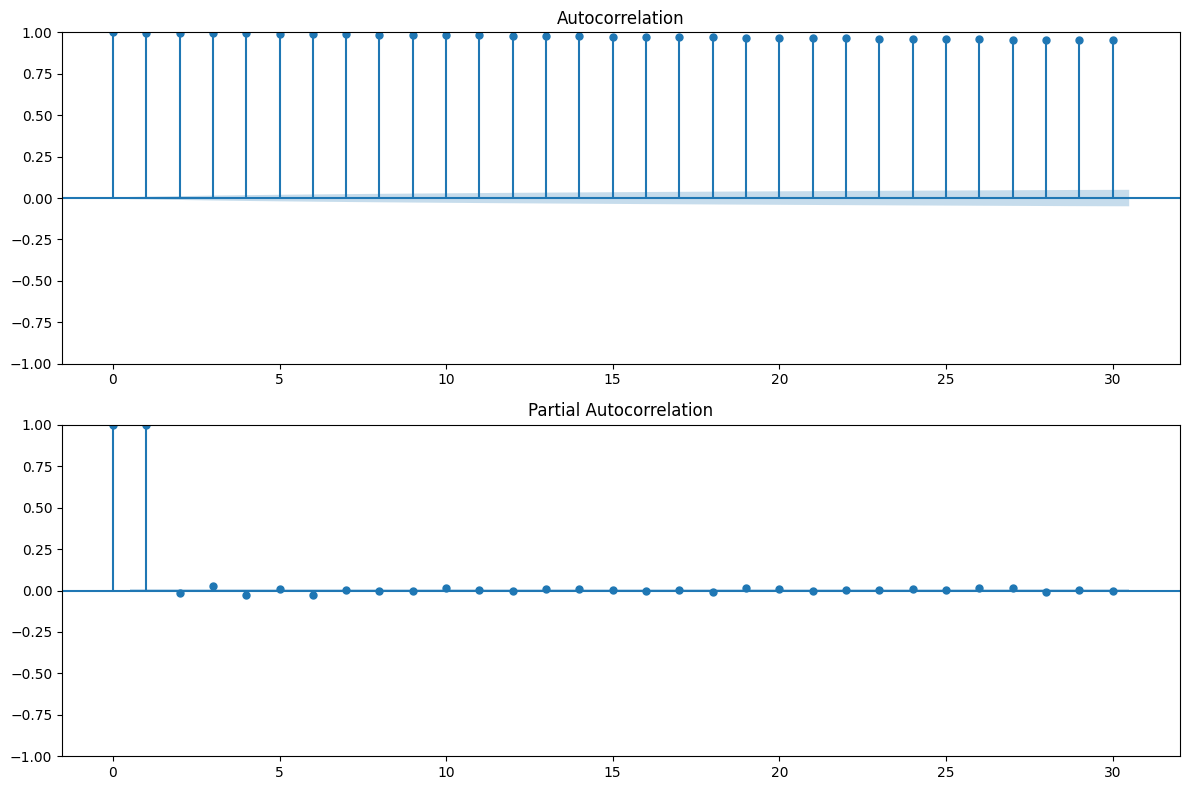

In [62]:
#ploting the autocorrelation function to determine the optimal parameters
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['close'], lags=30, ax=axs[0])
plot_pacf(df['close'], lags=30, ax=axs[1])
plt.tight_layout()
plt.show()

In [63]:
#fit the ARIMA model using the  optimal parameters
def fit_arima(df, p, d, q):
    model = sm.tsa.statespace.SARIMAX(df, order=(p, d, q))
    results = model.fit()
    return results

results = fit_arima(df['close'], p=1, d=1, q=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Load the data
data = pd.read_csv('/content/all_stocks_5yr[1].csv')

In [65]:
# Rename the date column
data = pd.read_csv('/content/all_stocks_5yr[1].csv')
data = data.rename(columns={'Timestamp': 'Date'})

In [66]:
print(data['date'].dtype)


object


In [67]:
data['date'] = pd.to_datetime(data['date'])

In [68]:
data.set_index('date', inplace=True)

In [69]:



# Calculate lagged returns
data['Lagged Return'] = data['close'].pct_change().shift(1)

# Calculate volume changes
data['Volume Change'] = data['volume'].pct_change()

# Calculate moving averages
data['MA_50'] = data['close'].rolling(window=50).mean()
data['MA_200'] = data['close'].rolling(window=200).mean()

# Drop the first 50 rows to avoid NaN values
data.dropna(inplace=True)

In [70]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [71]:
# Initialize the Gradient Boosting model
model = GradientBoostingRegressor()

# Train the model
model.fit(train_data[['Lagged Return', 'Volume Change', 'MA_50', 'MA_200']], train_data['close'])

GradientBoostingRegressor()

In [50]:
# Predict the stock prices for the test set
predictions = model.predict(test_data[['Lagged Return', 'Volume Change', 'MA_50', 'MA_200']])

# Calculate the metrics
mse = mean_squared_error(test_data['close'], predictions)
mae = mean_absolute_error(test_data['close'], predictions)
mape = mean_absolute_percentage_error(test_data['close'], predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 481.503339330463
MAE: 6.471770879004566
MAPE: 0.11161473726172483


In [ ]:
# Evaluate the ARFIMA model
# Calculate the metrics for the ARFIMA model
mse_arfima = mean_squared_error(test_data['close'], arfima_predictions)
mae_arfima = mean_absolute_error(test_data['close'], arfima_predictions)
mape_arfima = mean_absolute_percentage_error(test_data['close'], arfima_predictions)

print(f'ARFIMA MSE: {mse_arfima}')
print(f'ARFIMA MAE: {mae_arfima}')
print(f'ARFIMA MAPE: {mape_arfima}')

# Compare the performance of the models
if mse < mse_arfima:
    print('Gradient Boosting model is more accurate.')
elif mse > mse_arfima:
    print('ARFIMA model is more accurate.')
else:
    print('Both models have similar accuracy.')